# Análise Exploratória de Dados (EDA) - E-commerce Olist

**Projeto de Portfólio de Ciência de Dados**

* **Aluno:** Gustavo Garcia
* **Curso:** 23 Semestre, Ciência de Dados
* **Fonte de Dados:** [Olist E-commerce Dataset (Kaggle)](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

---

## 1. Introdução e Objetivos

Este projeto é uma Análise Exploratória de Dados (EDA) completa sobre um conjunto de dados públicos de e-commerce da Olist, contendo mais de 100.000 pedidos realizados entre 2016 e 2018.

O objetivo principal não é apenas descrever os dados, mas encontrar *insights* acionáveis que um gerente de e-commerce poderia usar para melhorar a operação.

**Nossas perguntas-chave são:**
1.  Qual é o principal fator que influencia a satisfação (nota) do cliente?
2.  É possível identificar gargalos na operação logística?
3.  Quando a logística funciona, mas o cliente ainda fica insatisfeito, qual é o motivo?
4.  Como a geografia (vendedor vs. cliente) afeta a performance?

## 2. Preparação dos Dados (Setup)

Primeiro, importamos as bibliotecas (Pandas, Matplotlib, Seaborn) e carregamos os múltiplos arquivos `.csv` em DataFrames.

Para tornar a análise viável, realizamos a junção (merge) das tabelas mais importantes:
* `olist_orders_dataset.csv`
* `olist_order_items_dataset.csv`
* `olist_customers_dataset.csv`
* `olist_order_reviews_dataset.csv`
* `olist_products_dataset.csv`
* `olist_sellers_dataset.csv`
* `product_category_name_translation.csv`

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Carregar os arquivos de dentro da pasta 'dados'
df_pedidos = pd.read_csv('dados/olist_orders_dataset.csv')
df_itens_pedido = pd.read_csv('dados/olist_order_items_dataset.csv')
df_clientes = pd.read_csv('dados/olist_customers_dataset.csv')
df_produtos = pd.read_csv('dados/olist_products_dataset.csv')
df_avaliacoes = pd.read_csv('dados/olist_order_reviews_dataset.csv')

# --- Juntando as tabelas ---
df_completo = pd.merge(df_pedidos, df_itens_pedido, on='order_id')
df_completo = pd.merge(df_completo, df_clientes, on='customer_id')

# --- Verificando o resultado ---
df_completo.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


## 3. Análise Central: Logística vs. Satisfação do Cliente

**Hipótese:** A performance da entrega (tempo e atraso) é o principal motor das avaliações dos clientes.

Para testar isso, realizamos uma **Engenharia de Atributos** para criar duas novas colunas:
1.  `tempo_entrega_dias`: O tempo total da compra até a entrega.
2.  `atraso_dias`: A diferença entre a data de entrega real e a data *estimada*. (Valores negativos significam entrega adiantada).

In [8]:
# --- 1. Junção Limpa para Análise Logística ---
# Vamos juntar os 'pedidos' originais com as 'avaliacoes'
# Isso nos dá 1 linha por pedido, com as datas e a nota
df_logistica = pd.merge(df_pedidos, 
                        df_avaliacoes, 
                        on='order_id')


# --- 2. Conversão de Datas (Crucial!) ---
# As colunas de data são lidas como texto. Precisamos convertê-las 
# para 'datetime' (datas de verdade) para podermos calcular.
# 'errors="coerce"' transforma qualquer data inválida em 'NaT' (Nulo)
df_logistica['order_purchase_timestamp'] = pd.to_datetime(df_logistica['order_purchase_timestamp'], errors='coerce')
df_logistica['order_delivered_customer_date'] = pd.to_datetime(df_logistica['order_delivered_customer_date'], errors='coerce')
df_logistica['order_estimated_delivery_date'] = pd.to_datetime(df_logistica['order_estimated_delivery_date'], errors='coerce')


# --- 3. Limpeza ---
# Vamos remover qualquer linha que não tenha as datas (ex: pedidos cancelados)
# O .dropna() remove linhas com valores Nulos (NaT)
df_logistica_limpo = df_logistica.dropna(subset=[
    'order_purchase_timestamp', 
    'order_delivered_customer_date', 
    'order_estimated_delivery_date'
])


# --- 4. Engenharia de Atributos (A Mágica) ---

# 4.1) Criar 'tempo_entrega_dias'
# Subtraímos a data de entrega da data da compra
delta_entrega = df_logistica_limpo['order_delivered_customer_date'] - df_logistica_limpo['order_purchase_timestamp']
# E pegamos apenas o número de dias
df_logistica_limpo['tempo_entrega_dias'] = delta_entrega.dt.days

# 4.2) Criar 'atraso_dias'
# Subtraímos a data de entrega da data ESTIMADA
delta_atraso = df_logistica_limpo['order_delivered_customer_date'] - df_logistica_limpo['order_estimated_delivery_date']
# E pegamos apenas o número de dias
df_logistica_limpo['atraso_dias'] = delta_atraso.dt.days


# --- 5. Inspecionar o Resultado ---
# Vamos ver as colunas que criamos junto com a nota!
colunas_interesse = ['review_score', 'tempo_entrega_dias', 'atraso_dias']
print("DataFrame logístico pronto para análise:")
df_logistica_limpo[colunas_interesse].head()

DataFrame logístico pronto para análise:


/var/folders/ds/vmxh48yj6xlc_v8sfg4rgjdr0000gp/T/ipykernel_12153/3727206015.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logistica_limpo['tempo_entrega_dias'] = delta_entrega.dt.days
/var/folders/ds/vmxh48yj6xlc_v8sfg4rgjdr0000gp/T/ipykernel_12153/3727206015.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logistica_limpo['atraso_dias'] = delta_atraso.dt.days


,review_score,tempo_entrega_dias,atraso_dias
0,4,8,-8
1,4,13,-6
2,5,9,-18
3,5,13,-13
4,5,2,-10


### 3.1. Visualizando o Impacto do Atraso

O gráfico Boxplot abaixo é a principal descoberta deste projeto. Ele mostra a distribuição dos dias de atraso para cada nota de avaliação (de 1 a 5). A linha preta pontilhada representa a "entrega no prazo" (Atraso Zero).

**Conclusão do Gráfico:**
* **Nota 1:** A vasta maioria dos clientes que deram nota 1 sofreu atrasos significativos (a "caixa" está bem acima da linha zero).
* **Nota 5:** A vasta maioria dos clientes que deu nota 5 recebeu o produto **antes** do prazo (a "caixa" está bem abaixo da linha zero).

**Insight:** A performance logística é o fator mais crítico para a satisfação do cliente.

/var/folders/ds/vmxh48yj6xlc_v8sfg4rgjdr0000gp/T/ipykernel_12153/2594719154.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='review_score', y='atraso_dias', data=df_grafico, palette='coolwarm')


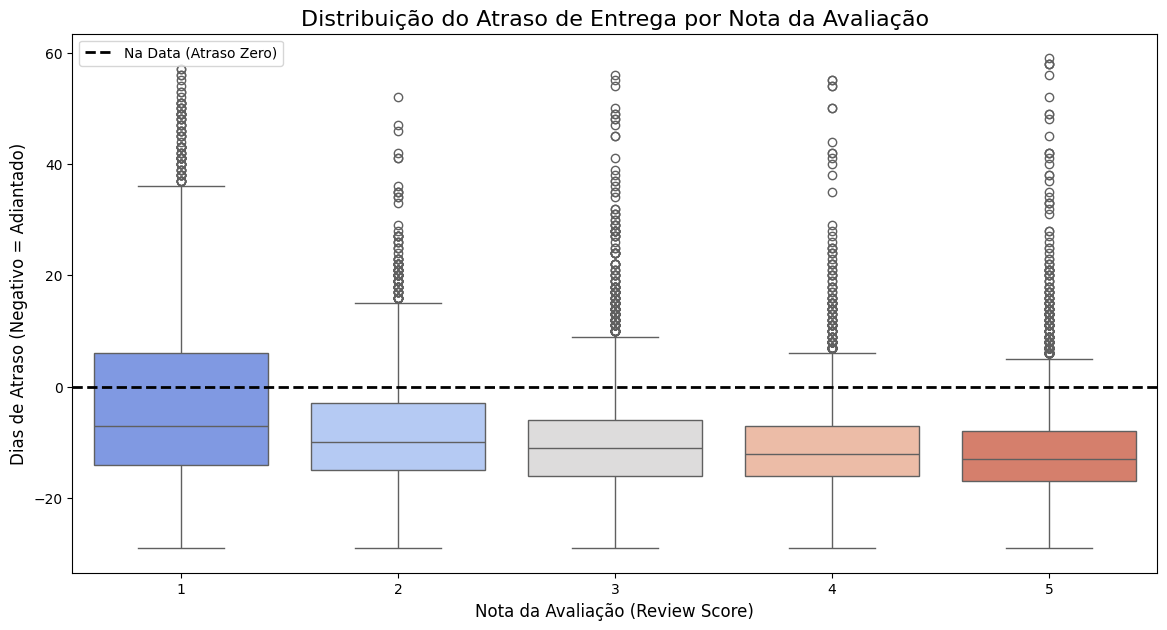

In [14]:
# --- 1. Preparação para o Gráfico ---
# Existem alguns atrasos "extremos" (ex: 200 dias), que são outliers
# e podem "amassar" nosso gráfico, escondendo a história principal.
# Vamos filtrar os dados para focar na maioria dos pedidos,
# por exemplo, de 30 dias adiantado (-30) até 60 dias atrasado (60).

df_grafico = df_logistica_limpo[
    (df_logistica_limpo['atraso_dias'] > -30) &
    (df_logistica_limpo['atraso_dias'] < 60)
]

# --- 2. Criação do Boxplot ---
plt.figure(figsize=(14, 7))

# O 'x' é nossa categoria (nota)
# O 'y' é o valor numérico (atraso)
sns.boxplot(x='review_score', y='atraso_dias', data=df_grafico, palette='coolwarm')

# Adicionar uma linha de referência no "Atraso Zero"
# 'axhline' desenha uma linha horizontal
plt.axhline(y=0, color='black', linestyle='--', linewidth=2, label='Na Data (Atraso Zero)')

# --- 3. Títulos e Legendas ---
plt.title('Distribuição do Atraso de Entrega por Nota da Avaliação', fontsize=16)
plt.xlabel('Nota da Avaliação (Review Score)', fontsize=12)
plt.ylabel('Dias de Atraso (Negativo = Adiantado)', fontsize=12)
plt.legend()

plt.show()

## 4. Análise de Causa Raiz: Isolando Problemas de Produto

A análise anterior levantou uma nova pergunta: "E quando a logística acerta, mas o cliente ainda dá nota 1?"

Isolamos esses casos (Nota 1 E Atraso <= 0) para identificar problemas de **qualidade do produto**.

**Insight:** O gráfico abaixo mostra as categorias de produtos que mais recebem notas baixas, *mesmo* com uma entrega pontual. Isso sugere problemas de qualidade, descrição incorreta ou produtos danificados, que não têm relação com a logística.

--- Categorias com Mais Avaliações Nota 1 (Mesmo com Entrega no Prazo) ---
product_category_name_english
bed_bath_table           1101
furniture_decor           846
computers_accessories     779
health_beauty             571
sports_leisure            566
housewares                544
watches_gifts             434
telephony                 361
garden_tools              353
auto                      279
Name: count, dtype: int64

Gerando gráfico...


/var/folders/ds/vmxh48yj6xlc_v8sfg4rgjdr0000gp/T/ipykernel_12153/2194435324.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_problemas.values, y=top_10_problemas.index, palette='Reds_r')


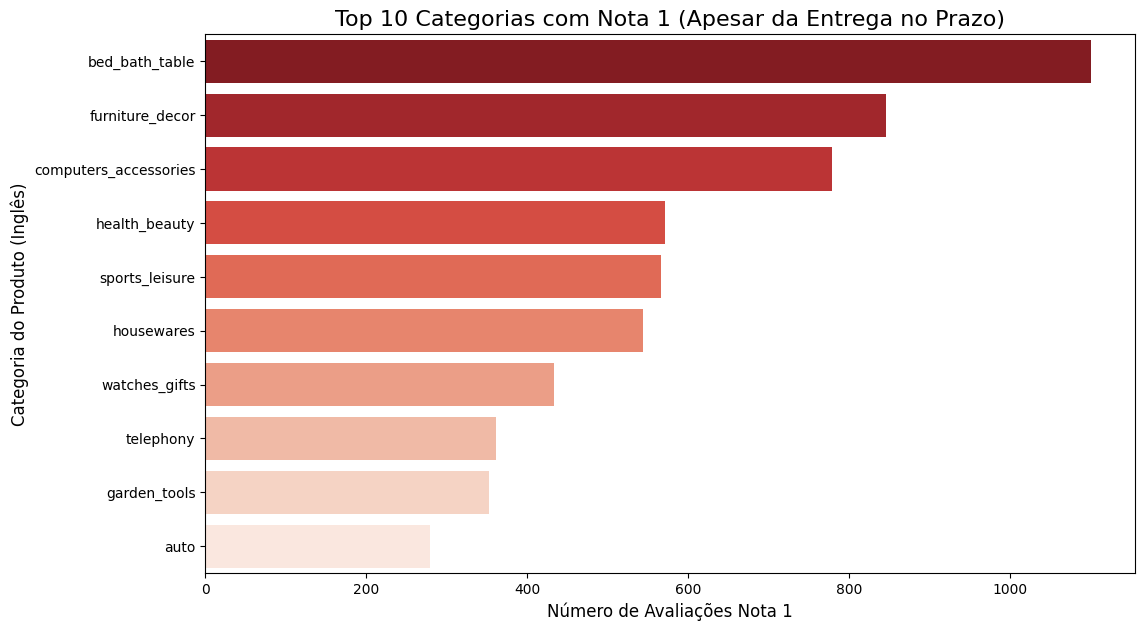

In [15]:
# O DataFrame de TRADUÇÃO (para sabermos o nome das categorias em inglês)
df_traducao = pd.read_csv('dados/product_category_name_translation.csv')


# --- 2. Preparar as Tabelas para a Junção ---

# Juntar os produtos com suas traduções
df_produtos_traduzidos = pd.merge(df_produtos, 
                                  df_traducao, 
                                  on='product_category_name')

# Selecionar apenas as colunas que importam do nosso df_logistica_limpo
df_logistica_essencial = df_logistica_limpo[['order_id', 'review_score', 'atraso_dias']]

# Selecionar apenas as colunas que importam do df_produtos_traduzidos
df_produtos_essencial = df_produtos_traduzidos[['product_id', 'product_category_name_english']]

# O df_itens_pedido é a "ponte" que liga pedidos (order_id) a produtos (product_id)
# (Já carregamos antes, mas podemos recarregar por segurança)
df_itens_pedido = pd.read_csv('dados/olist_order_items_dataset.csv')


# --- 3. A Grande Junção (Merge) ---

# Juntar nossa análise de logística (df_logistica_essencial) com os itens (df_itens_pedido)
# Agora sabemos a nota e o atraso de cada item
df_merge_1 = pd.merge(df_logistica_essencial, df_itens_pedido, on='order_id')

# Juntar o resultado com os nomes das categorias (df_produtos_essencial)
# AGORA TEMOS O DATAFRAME COMPLETO: Nota, Atraso, e Categoria do Produto
df_analise_final = pd.merge(df_merge_1, df_produtos_essencial, on='product_id')


# --- 4. A Mágica: Filtrar e Analisar ---

# Criar os filtros
filtro_nota_baixa = (df_analise_final['review_score'] == 1)
filtro_boa_logistica = (df_analise_final['atraso_dias'] <= 0) # Entregue no prazo ou adiantado

# Aplicar os filtros
df_problemas_produto = df_analise_final[filtro_nota_baixa & filtro_boa_logistica]

# Contar quais categorias aparecem mais nesta "lista da vergonha"
contagem_categorias_problema = df_problemas_produto['product_category_name_english'].value_counts()


# --- 5. Visualizar o Resultado ---

# Pegar as 10 piores categorias
top_10_problemas = contagem_categorias_problema.head(10)

print("--- Categorias com Mais Avaliações Nota 1 (Mesmo com Entrega no Prazo) ---")
print(top_10_problemas)
print("\nGerando gráfico...")

# Criar o gráfico de barras (horizontal é melhor para nomes longos)
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_problemas.values, y=top_10_problemas.index, palette='Reds_r')

plt.title('Top 10 Categorias com Nota 1 (Apesar da Entrega no Prazo)', fontsize=16)
plt.xlabel('Número de Avaliações Nota 1', fontsize=12)
plt.ylabel('Categoria do Produto (Inglês)', fontsize=12)

plt.show()

## 5. Análise de Contexto

Para entender melhor a operação, analisamos duas áreas de contexto: Pagamentos e Malha Logística.

### 5.1. Comportamento de Pagamento

**Insight:** O Cartão de Crédito domina, mas o Boleto ainda é muito relevante. No cartão, vemos picos claros de parcelamento (1x, 2x, 3x, 5x, 10x), sugerindo que as ofertas de parcelamento "sem juros" ditam o comportamento do cliente.

--- Análise 1: Popularidade dos Métodos de Pagamento ---


/var/folders/ds/vmxh48yj6xlc_v8sfg4rgjdr0000gp/T/ipykernel_12153/3158451291.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


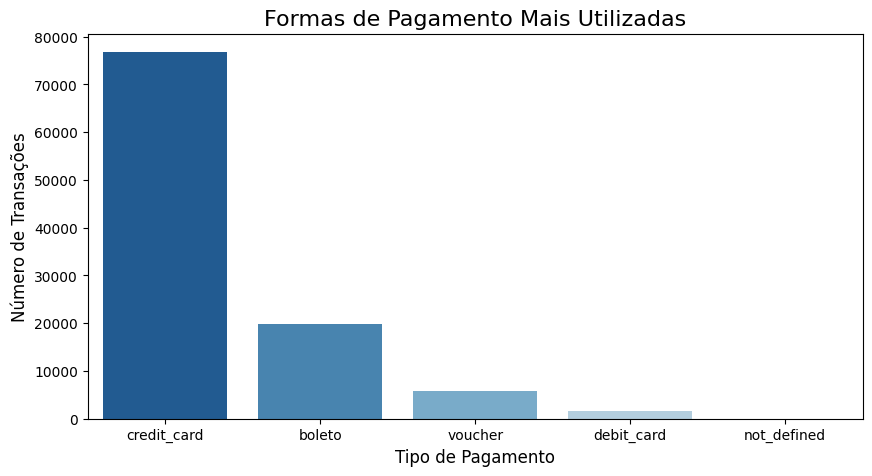


--- Análise 2: Distribuição de Parcelas no Cartão de Crédito ---


/var/folders/ds/vmxh48yj6xlc_v8sfg4rgjdr0000gp/T/ipykernel_12153/3158451291.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


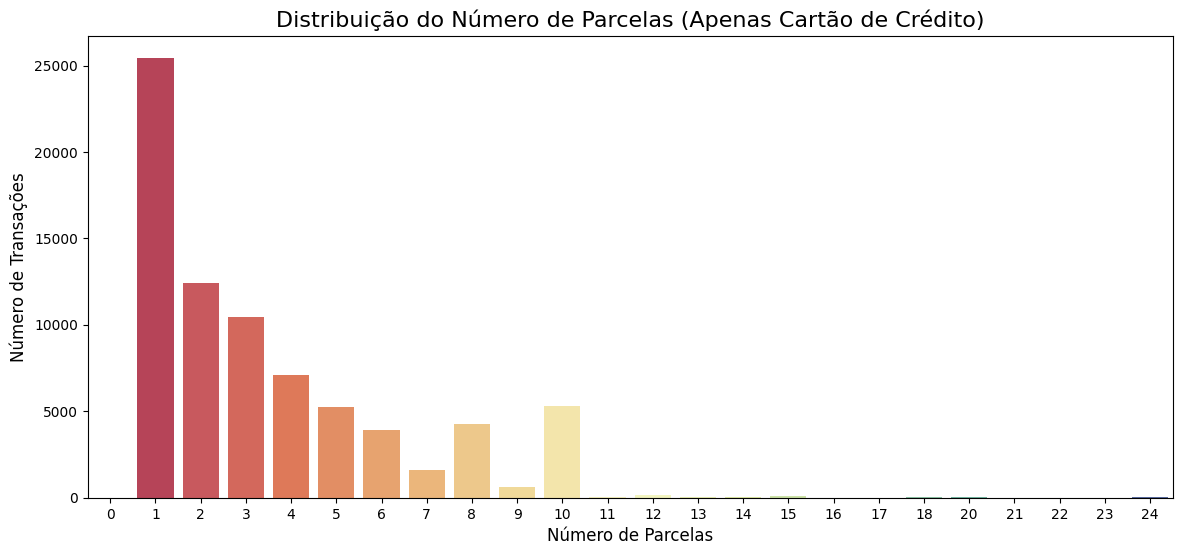

In [16]:
# --- 1. Carregar os Dados ---
# (Não precisamos mais juntar nada, esta tabela se basta por enquanto)
df_pagamentos = pd.read_csv('dados/olist_order_payments_dataset.csv')


# --- 2. Análise 1: Tipos de Pagamento Mais Usados ---
print("--- Análise 1: Popularidade dos Métodos de Pagamento ---")

# Vamos criar o gráfico
plt.figure(figsize=(10, 5))

# .countplot() é perfeito para contar categorias
# Usamos 'order' para ordenar as barras da mais popular para a menos
sns.countplot(
    data=df_pagamentos, 
    x='payment_type', 
    palette='Blues_r', 
    order=df_pagamentos['payment_type'].value_counts().index
)

plt.title('Formas de Pagamento Mais Utilizadas', fontsize=16)
plt.xlabel('Tipo de Pagamento', fontsize=12)
plt.ylabel('Número de Transações', fontsize=12)
plt.show()


# --- 3. Análise 2: Distribuição de Parcelas (Cartão de Crédito) ---
print("\n--- Análise 2: Distribuição de Parcelas no Cartão de Crédito ---")

# Primeiro, vamos filtrar nosso DataFrame para pegar APENAS transações de 'credit_card'
df_cartao = df_pagamentos[df_pagamentos['payment_type'] == 'credit_card']

# Agora, vamos criar um gráfico para o número de parcelas
plt.figure(figsize=(14, 6))

sns.countplot(
    data=df_cartao, 
    x='payment_installments', 
    palette='Spectral'
)

plt.title('Distribuição do Número de Parcelas (Apenas Cartão de Crédito)', fontsize=16)
plt.xlabel('Número de Parcelas', fontsize=12)
plt.ylabel('Número de Transações', fontsize=12)
plt.show()

### 5.2. Análise da Malha Logística (Vendedor vs. Cliente)

**Hipótese:** Pedidos enviados de dentro do mesmo estado são mais rápidos e deixam os clientes mais satisfeitos.

Criamos uma coluna `tipo_frete` ('Intraestadual' vs. 'Interestadual') para comparar.

**Insight:** A hipótese foi confirmada.
1.  **Tempo de Entrega:** Pedidos intraestaduais são, em média, muito mais rápidos.
2.  **Satisfação:** A nota média de pedidos intraestaduais é visivelmente maior.

Isso prova o valor estratégico de ter vendedores (sellers) localizados próximos aos seus principais centros consumidores.

In [17]:
# --- 2. Carregar os Dados Faltantes ---
df_sellers = pd.read_csv('dados/olist_sellers_dataset.csv')

# --- 3. Preparar e Juntar as Peças ---

# Nosso ponto de partida: os dados de logística com notas e datas
# Vamos pegar apenas as colunas que importam
df_logistica_base = df_logistica_limpo[['order_id', 'customer_id', 'review_score', 'tempo_entrega_dias']]

# Precisamos do 'seller_id'. Ele está em 'df_itens_pedido'
# Um pedido pode ter vários itens do MESMO vendedor. Vamos pegar apenas uma linha por pedido/vendedor
df_itens_unico = df_itens_pedido[['order_id', 'seller_id']].drop_duplicates()

# Agora, vamos adicionar o 'seller_id' ao nosso dataframe de logística
df_merge_1 = pd.merge(df_logistica_base, df_itens_unico, on='order_id')

# Agora, vamos adicionar o ESTADO do vendedor ('seller_state')
df_merge_2 = pd.merge(df_merge_1, df_sellers[['seller_id', 'seller_state']], on='seller_id')

# Finalmente, vamos adicionar o ESTADO do cliente ('customer_state')
df_analise_malha = pd.merge(df_merge_2, df_clientes[['customer_id', 'customer_state']], on='customer_id')


# --- 4. Engenharia de Atributos: A Mágica ---

# Vamos criar uma coluna 'tipo_frete'
# Se o estado do vendedor for IGUAL ao do cliente, é 'Intraestadual'
# Se for DIFERENTE, é 'Interestadual'
df_analise_malha['tipo_frete'] = np.where(
    df_analise_malha['seller_state'] == df_analise_malha['customer_state'],
    '1. Intraestadual (Mesmo Estado)',
    '2. Interestadual (Outro Estado)'
)

print("DataFrame da Malha Logística criado com sucesso!")
df_analise_malha[['order_id', 'review_score', 'tempo_entrega_dias', 'seller_state', 'customer_state', 'tipo_frete']].head()

DataFrame da Malha Logística criado com sucesso!


,order_id,review_score,tempo_entrega_dias,seller_state,customer_state,tipo_frete
0,e481f51cbdc54678b7cc49136f2d6af7,4,8,SP,SP,1. Intraestadual (Mesmo Estado)
1,53cdb2fc8bc7dce0b6741e2150273451,4,13,SP,BA,2. Interestadual (Outro Estado)
2,47770eb9100c2d0c44946d9cf07ec65d,5,9,SP,GO,2. Interestadual (Outro Estado)
3,949d5b44dbf5de918fe9c16f97b45f8a,5,13,MG,RN,2. Interestadual (Outro Estado)
4,ad21c59c0840e6cb83a9ceb5573f8159,5,2,SP,SP,1. Intraestadual (Mesmo Estado)


Calculando Tempo Médio de Entrega...


/var/folders/ds/vmxh48yj6xlc_v8sfg4rgjdr0000gp/T/ipykernel_12153/3358604270.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Calculando Nota Média...


/var/folders/ds/vmxh48yj6xlc_v8sfg4rgjdr0000gp/T/ipykernel_12153/3358604270.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


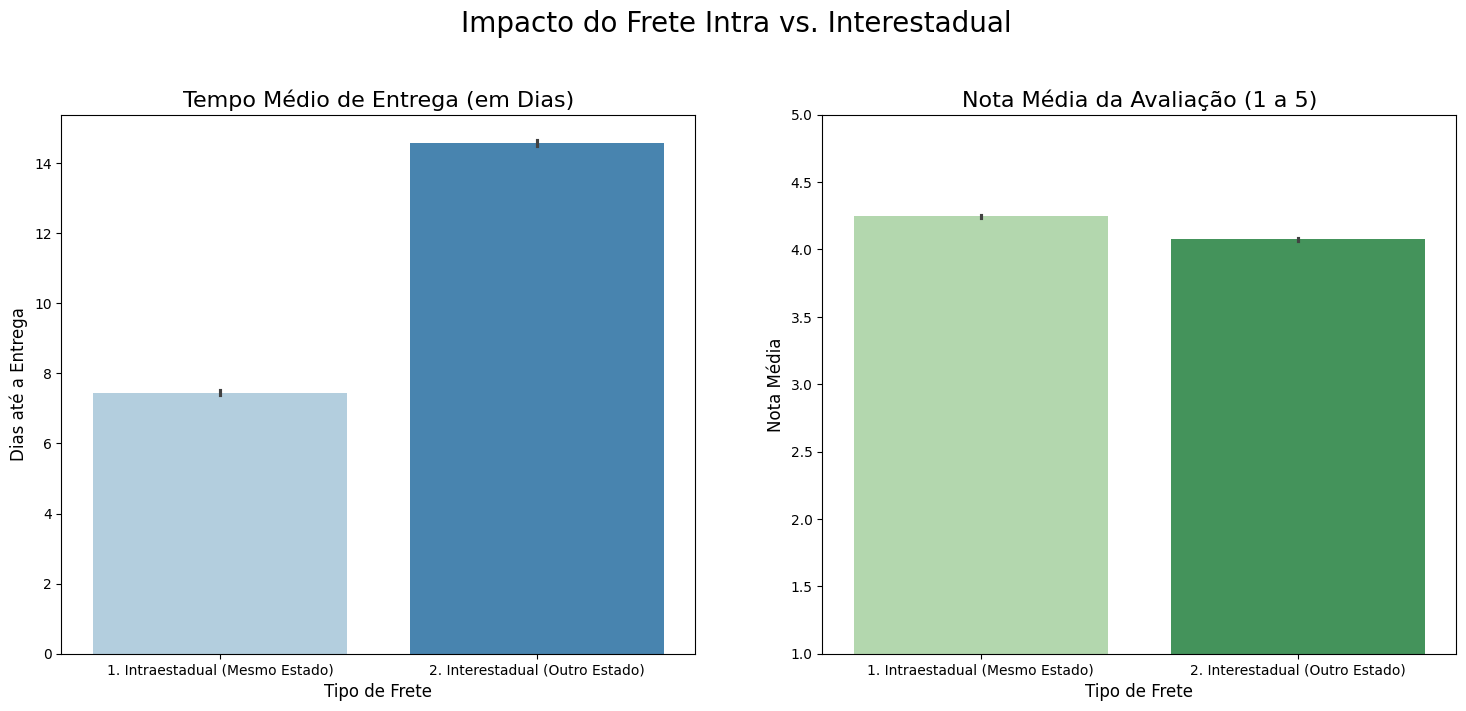

In [18]:
# --- 1. Criar os Gráficos Lado a Lado ---
# Isso permite criar múltiplos gráficos em uma só "figura"
fig, axes = plt.subplots(1, 2, figsize=(18, 7))


# --- Gráfico 1: Tempo Médio de Entrega ---
print("Calculando Tempo Médio de Entrega...")
sns.barplot(
    data=df_analise_malha,
    x='tipo_frete',
    y='tempo_entrega_dias',
    ax=axes[0],  # Diz para desenhar no primeiro espaço
    palette='Blues'
)
axes[0].set_title('Tempo Médio de Entrega (em Dias)', fontsize=16)
axes[0].set_xlabel('Tipo de Frete', fontsize=12)
axes[0].set_ylabel('Dias até a Entrega', fontsize=12)


# --- Gráfico 2: Nota Média da Avaliação ---
print("Calculando Nota Média...")
sns.barplot(
    data=df_analise_malha,
    x='tipo_frete',
    y='review_score',
    ax=axes[1],  # Diz para desenhar no segundo espaço
    palette='Greens'
)
axes[1].set_title('Nota Média da Avaliação (1 a 5)', fontsize=16)
axes[1].set_xlabel('Tipo de Frete', fontsize=12)
axes[1].set_ylabel('Nota Média', fontsize=12)

# Definir o limite do eixo Y de 1 a 5 para o gráfico de notas
axes[1].set_ylim(1, 5)

# Mostrar a figura inteira
plt.suptitle('Impacto do Frete Intra vs. Interestadual', fontsize=20, y=1.03)
plt.show()

## 6. Conclusão Geral do Projeto

Esta análise exploratória revelou que a operação de e-commerce da Olist é altamente dependente do desempenho logístico.

* **Ponto Forte:** Clientes que recebem produtos adiantados quase sempre dão nota 5.
* **Gargalo Principal:** Atrasos na entrega são a principal causa de insatisfação (nota 1).
* **Insight Oculto:** Mesmo com uma logística perfeita, problemas de qualidade em categorias específicas (como cama, mesa e banho) prejudicam a reputação.
* **Oportunidade Estratégica:** Incentivar vendedores locais (frete intraestadual) é a chave para reduzir prazos, aumentar a satisfação e, consequentemente, fidelizar clientes.